In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
from statistics import mean, stdev

In [2]:
#load and display the data set
dataSet = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")
dataSet


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
#describe the dataset
dataSet.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [4]:
#Displaying Count of Dataset
dataSet.count()

index                       1000
Patient Id                  1000
Age                         1000
Gender                      1000
Air Pollution               1000
Alcohol use                 1000
Dust Allergy                1000
OccuPational Hazards        1000
Genetic Risk                1000
chronic Lung Disease        1000
Balanced Diet               1000
Obesity                     1000
Smoking                     1000
Passive Smoker              1000
Chest Pain                  1000
Coughing of Blood           1000
Fatigue                     1000
Weight Loss                 1000
Shortness of Breath         1000
Wheezing                    1000
Swallowing Difficulty       1000
Clubbing of Finger Nails    1000
Frequent Cold               1000
Dry Cough                   1000
Snoring                     1000
Level                       1000
dtype: int64

In [5]:
#Displaying count of null
dataSet.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
#separate the independent(features) and dependent(class) variables
features = dataSet.drop(['Patient Id', 'Level'], axis='columns')
targetClass = dataSet['Level']

In [7]:
# Feature Scaling for input features.
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
feature_scaled = scaler.fit_transform(features)

In [8]:
#K-fold cross validation with 10 splits
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [9]:
# Get the labels of the features
f_labels = features.columns
f_labels

Index(['index', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring'],
      dtype='object')

In [10]:
# Get the labels of the targetClass
c_labels = targetClass.unique()
c_labels

array(['Low', 'Medium', 'High'], dtype=object)

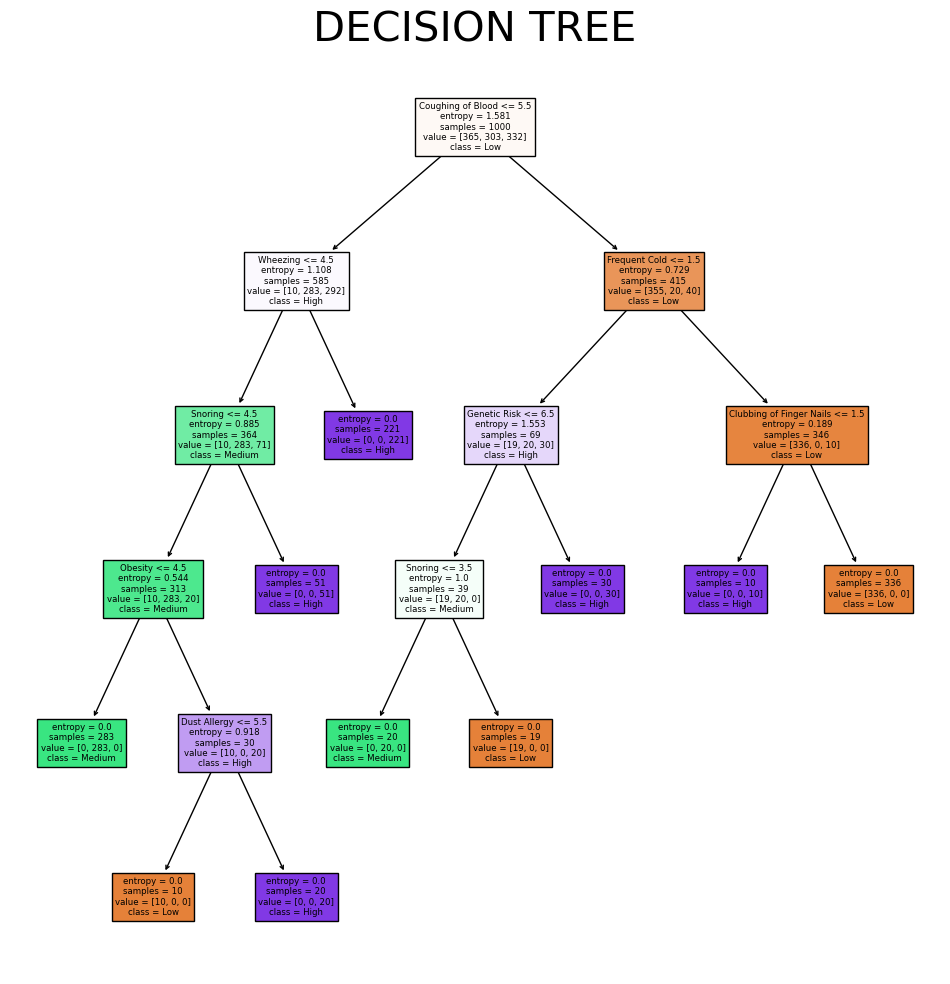

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt


# Create a decision tree classifier
dt_model = tree.DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the iris dataset
dt_model = dt_model.fit(features, targetClass)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dt_model, filled=True, feature_names=f_labels, class_names=c_labels)
ax.set_title("DECISION TREE", fontsize=30, ha='center', va='center')
plt.show()

In [12]:
#K Fold Cross Validation

dt_lst_accu_stratified = []
dt_overall_cm = np.zeros((3, 3))
for train_index, test_index in skf.split(features, targetClass):
    x_train_fold, x_test_fold = feature_scaled[train_index], feature_scaled[test_index]
    y_train_fold, y_test_fold = targetClass[train_index], targetClass[test_index]
    
    
    dt_model.fit(x_train_fold, y_train_fold)
    dt_lst_accu_stratified.append(dt_model.score(x_test_fold, y_test_fold))
   
    #Create the confusion matrix
    dt_y_pred = dt_model.predict(x_test_fold)
    cm = confusion_matrix(y_test_fold, dt_y_pred)
    
    dt_overall_cm += cm
    
# Print the output.
print("DECISION TREE MODEL K FOLD CROSS VALIDATION\n")
print('List of possible accuracy:', dt_lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(dt_lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(dt_lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(dt_lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(dt_lst_accu_stratified))

DECISION TREE MODEL K FOLD CROSS VALIDATION

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [13]:
# Print the overall confusion matrix
print("Overall Confusion Matrix:")
print(dt_overall_cm)

Overall Confusion Matrix:
[[365.   0.   0.]
 [  0. 303.   0.]
 [  0.   0. 332.]]


In [14]:
#Calculating the performance scores
dt_tp1, dt_tp2, dt_tp3 = 365, 303, 332
dt_fp1, dt_fp2, dt_fp3 = 0, 0, 0
dt_tn1, dt_tn2, dt_tn3 = 635, 697, 668
dt_fn1, dt_fn2, dt_fn3 = 0, 0, 0

dt_tp = dt_tp1 + dt_tp2 + dt_tp3
dt_fp = dt_fp1 + dt_fp2 + dt_fp3
dt_tn = dt_tn1 + dt_tn2 + dt_tn3
dt_fn = dt_fn1 + dt_fn2 + dt_fn3


dt_accuracy = (dt_tp + dt_tn) / (dt_tp + dt_tn + dt_fp + dt_fn)

dt_precision_class1 = dt_tp1 / (dt_tp1 + dt_fp1)
dt_precision_class2 = dt_tp2 / (dt_tp2 + dt_fp2)
dt_precision_class3 = dt_tp3 / (dt_tp3 + dt_fp3)
dt_precision_average = (dt_precision_class1 + dt_precision_class2 + dt_precision_class3) / 3

dt_recall_class1 = dt_tp1 / (dt_tp1 + dt_fn1)
dt_recall_class2 = dt_tp2 / (dt_tp2 + dt_fn2)
dt_recall_class3 = dt_tp3 / (dt_tp3 + dt_fn3)
dt_recall_average = (dt_recall_class1 + dt_recall_class2 + dt_recall_class3) / 3

dt_specificity_class1 = dt_tn1 / ( dt_fp1 + dt_tn1 )
dt_specificity_class2 = dt_tn2 / ( dt_fp2 + dt_tn2 )
dt_specificity_class3 = dt_tn3 / ( dt_fp3 + dt_tn3 )
dt_specificity_average = (dt_specificity_class1 + dt_specificity_class2 + dt_specificity_class3) / 3

dt_sensitivity_class1 = dt_tp1 / (dt_tp1 + dt_fn1)
dt_sensitivity_class2 = dt_tp2 / (dt_tp2 + dt_fn2)
dt_sensitivity_class3 = dt_tp3 / (dt_tp3 + dt_fn3)
dt_sensitivity_average = (dt_sensitivity_class1 + dt_sensitivity_class2 + dt_sensitivity_class3) / 3

dt_f1 = 2 * (dt_precision_average * dt_recall_average) / (dt_precision_average + dt_recall_average)

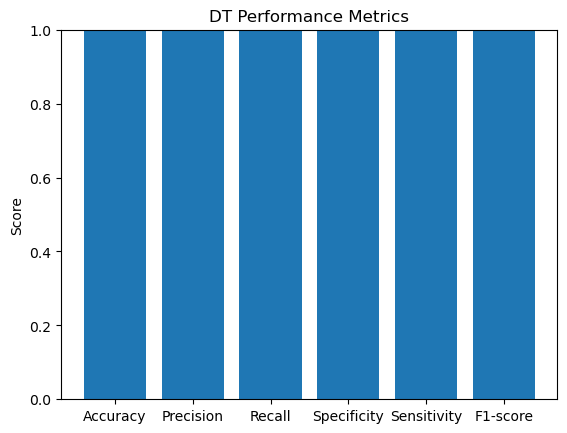

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
Specificity: 100.0%
Sensitivity: 100.0%
F1-score: 100.0%


In [15]:
#Plot the performance scores
dt_f1 = 2 * (dt_precision_average * dt_recall_average) / (dt_precision_average + dt_recall_average)
scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [dt_accuracy,dt_precision_average, dt_recall_average, dt_specificity_average,dt_sensitivity_average, dt_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('DT Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

# 
# 
# **NAIVE BAYES**

In [16]:
from sklearn.naive_bayes import GaussianNB

nb =  GaussianNB()

In [17]:
#K Fold Cross Validation

nb_lst_accu_stratified = []
nb_overall_cm = np.zeros((3, 3))
for train_index, test_index in skf.split(features, targetClass):
    x_train_fold, x_test_fold = feature_scaled[train_index], feature_scaled[test_index]
    y_train_fold, y_test_fold = targetClass[train_index], targetClass[test_index]
    
    #Train the model using the Training Data
    nb.fit(x_train_fold, y_train_fold)
    nb_lst_accu_stratified.append(nb.score(x_test_fold, y_test_fold))
    
    #Create the confusion matrix
    nb_y_pred = nb.predict(x_test_fold)
    cm = confusion_matrix(y_test_fold, nb_y_pred)
    
    nb_overall_cm += cm

# Print the output.
print("NAIVE BAYES MODEL K FOLD CROSS VALIDATION\n")
print('List of possible accuracy:', nb_lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(nb_lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(nb_lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(nb_lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(nb_lst_accu_stratified))

NAIVE BAYES MODEL K FOLD CROSS VALIDATION

List of possible accuracy: [0.86, 0.95, 0.93, 0.84, 0.92, 0.85, 0.88, 0.9, 0.86, 0.91]

Maximum Accuracy That can be obtained from this model is: 95.0 %

Minimum Accuracy: 84.0 %

Overall Accuracy: 89.0 %

Standard Deviation is: 0.03741657386773943


In [18]:
# Print the overall confusion matrix
print("Overall Confusion Matrix:")
print(nb_overall_cm)


Overall Confusion Matrix:
[[345.   0.  20.]
 [ 10. 273.  20.]
 [ 60.   0. 272.]]


In [19]:
#Calculating the performance scores
nb_tp1, nb_tp2, nb_tp3 = 345, 273, 272
nb_fp1, nb_fp2, nb_fp3 = 70, 0, 40
nb_tn1, nb_tn2, nb_tn3 = 545, 617, 618
nb_fn1, nb_fn2, nb_fn3 = 20, 30, 60

nb_tp = nb_tp1 + nb_tp2 + nb_tp3
nb_fp = nb_fp1 + nb_fp2 + nb_fp3
nb_tn = nb_tn1 + nb_tn2 + nb_tn3
nb_fn = nb_fn1 + nb_fn2 + nb_fn3


nb_accuracy = (nb_tp + nb_tn) / (nb_tp + nb_tn + nb_fp + nb_fn)

nb_precision_class1 = nb_tp1 / (nb_tp1 + nb_fp1)
nb_precision_class2 = nb_tp2 / (nb_tp2 + nb_fp2)
nb_precision_class3 = nb_tp3 / (nb_tp3 + nb_fp3)
nb_precision_average = (nb_precision_class1 + nb_precision_class2 + nb_precision_class3) / 3

nb_recall_class1 = nb_tp1 / (nb_tp1 + nb_fn1)
nb_recall_class2 = nb_tp2 / (nb_tp2 + nb_fn2)
nb_recall_class3 = nb_tp3 / (nb_tp3 + nb_fn3)
nb_recall_average = (nb_recall_class1 + nb_recall_class2 + nb_recall_class3) / 3

nb_specificity_class1 = nb_tn1 / ( nb_fp1 + nb_tn1 )
nb_specificity_class2 = nb_tn2 / ( nb_fp2 + nb_tn2 )
nb_specificity_class3 = nb_tn3 / ( nb_fp3 + nb_tn3 )
nb_specificity_average = (nb_specificity_class1 + nb_specificity_class2 + nb_specificity_class3) / 3

nb_sensitivity_class1 = nb_tp1 / (nb_tp1 + nb_fn1)
nb_sensitivity_class2 = nb_tp2 / (nb_tp2 + nb_fn2)
nb_sensitivity_class3 = nb_tp3 / (nb_tp3 + nb_fn3)
nb_sensitivity_average = (nb_sensitivity_class1 + nb_sensitivity_class2 + nb_sensitivity_class3) / 3

nb_f1 = 2 * (nb_precision_average * nb_recall_average) / (nb_precision_average + nb_recall_average)

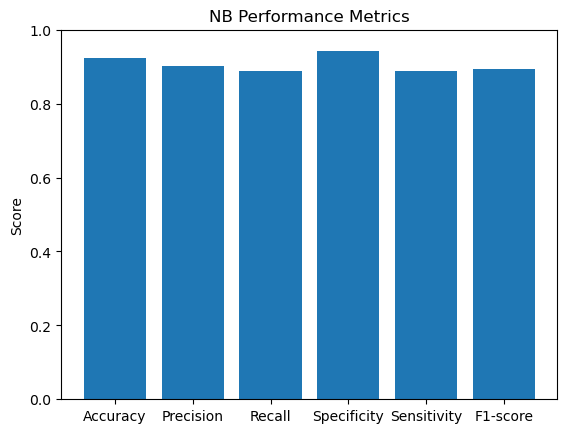

Accuracy: 92.38754325259517%
Precision: 90.10400576665637%
Recall: 88.8490895631897%
Specificity: 94.17961960774623%
Sensitivity: 88.8490895631897%
F1-score: 89.4721475882582%


In [20]:
#Plot the performance scores
scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [nb_accuracy,nb_precision_average, nb_recall_average, nb_specificity_average,nb_sensitivity_average, nb_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('NB Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

# 
# 
# **REGULARIZED LOGISTIC REGRESSION**

In [21]:
from sklearn.linear_model import LogisticRegression

#Create a Regularized Logistic Regression Model
rlr_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [22]:
#K Fold Cross Validation

rlr_lst_accu_stratified = []
rlr_overall_cm = np.zeros((3, 3))
for train_index, test_index in skf.split(features, targetClass):
    x_train_fold, x_test_fold = feature_scaled[train_index], feature_scaled[test_index]
    y_train_fold, y_test_fold = targetClass[train_index], targetClass[test_index]
    
    #Train the model using the Training Data
    rlr_model.fit(x_train_fold, y_train_fold)
    rlr_lst_accu_stratified.append(rlr_model.score(x_test_fold, y_test_fold))
    
    #Create the confusion matrix
    rlr_y_pred = rlr_model.predict(x_test_fold)
    cm = confusion_matrix(y_test_fold, rlr_y_pred)
    
    rlr_overall_cm += cm
    
# Print the output.
print("REGULARIZED LOGISTIC REGRESSION MODEL K FOLD CROSS VALIDATION\n")
print('List of possible accuracy:', rlr_lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(rlr_lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(rlr_lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(rlr_lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(rlr_lst_accu_stratified))

REGULARIZED LOGISTIC REGRESSION MODEL K FOLD CROSS VALIDATION

List of possible accuracy: [0.43, 0.4, 0.44, 0.4, 0.42, 0.41, 0.45, 0.56, 0.59, 0.61]

Maximum Accuracy That can be obtained from this model is: 61.0 %

Minimum Accuracy: 40.0 %

Overall Accuracy: 47.099999999999994 %

Standard Deviation is: 0.0822529972435993


In [23]:
# Print the overall confusion matrix
print("Overall Confusion Matrix:")
print(rlr_overall_cm)

Overall Confusion Matrix:
[[365.   0.   0.]
 [233.  70.   0.]
 [296.   0.  36.]]


In [24]:
#Calculating the performance scores
rlr_tp1, rlr_tp2, rlr_tp3 = 365, 70, 36
rlr_fp1, rlr_fp2, rlr_fp3 = 529, 0, 0
rlr_tn1, rlr_tn2, rlr_tn3 = 106, 401, 435
rlr_fn1, rlr_fn2, rlr_fn3 = 0, 233, 296

rlr_tp = rlr_tp1 + rlr_tp2 + rlr_tp3
rlr_fp = rlr_fp1 + rlr_fp2 + rlr_fp3
rlr_tn = rlr_tn1 + rlr_tn2 + rlr_tn3
rlr_fn = rlr_fn1 + rlr_fn2 + rlr_fn3


rlr_accuracy = (rlr_tp + rlr_tn) / (rlr_tp + rlr_tn + rlr_fp + rlr_fn)

rlr_precision_class1 = rlr_tp1 / (rlr_tp1 + rlr_fp1)
rlr_precision_class2 = rlr_tp2 / (rlr_tp2 + rlr_fp2)
rlr_precision_class3 = rlr_tp3 / (rlr_tp3 + rlr_fp3)
rlr_precision_average = (rlr_precision_class1 + rlr_precision_class2 + rlr_precision_class3) / 3

rlr_recall_class1 = rlr_tp1 / (rlr_tp1 + rlr_fn1)
rlr_recall_class2 = rlr_tp2 / (rlr_tp2 + rlr_fn2)
rlr_recall_class3 = rlr_tp3 / (rlr_tp3 + rlr_fn3)
rlr_recall_average = (rlr_recall_class1 + rlr_recall_class2 + rlr_recall_class3) / 3

rlr_specificity_class1 = rlr_tn1 / ( rlr_fp1 + rlr_tn1 )
rlr_specificity_class2 = rlr_tn2 / ( rlr_fp2 + rlr_tn2 )
rlr_specificity_class3 = rlr_tn3 / ( rlr_fp3 + rlr_tn3 )
rlr_specificity_average = (rlr_specificity_class1 + rlr_specificity_class2 + rlr_specificity_class3) / 3

rlr_sensitivity_class1 = rlr_tp1 / (rlr_tp1 + rlr_fn1)
rlr_sensitivity_class2 = rlr_tp2 / (rlr_tp2 + rlr_fn2)
rlr_sensitivity_class3 = rlr_tp3 / (rlr_tp3 + rlr_fn3)
rlr_sensitivity_average = (rlr_sensitivity_class1 + rlr_sensitivity_class2 + rlr_sensitivity_class3) / 3

rlr_f1 = 2 * (rlr_precision_average * rlr_recall_average) / (rlr_precision_average + rlr_recall_average)

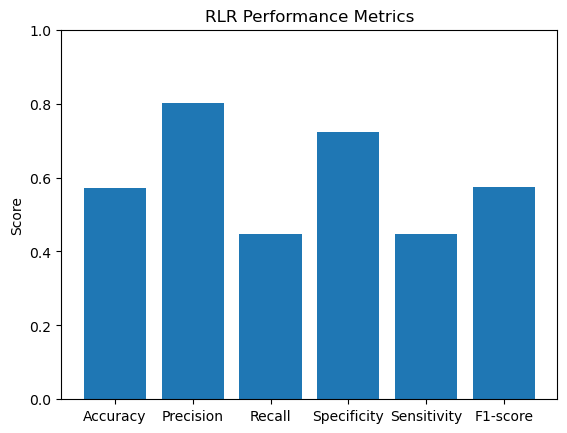

Accuracy: 57.18332658842574%
Precision: 80.27591349739001%
Recall: 44.648561241666336%
Specificity: 72.23097112860893%
Sensitivity: 44.648561241666336%
F1-score: 57.38193492517223%


In [25]:
#Plot the performance scores

scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [rlr_accuracy,rlr_precision_average,rlr_recall_average, rlr_specificity_average,rlr_sensitivity_average, rlr_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('RLR Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

# 
# 
# **SUPPORT VECTOR MACHINE**

In [26]:
from sklearn.svm import SVC

#Create a model for Support Vector Machine
svm_model = SVC(kernel ='linear')

In [27]:
#K Fold Cross Validation

svm_lst_accu_stratified = []
svm_overall_cm = np.zeros((3, 3))
for train_index, test_index in skf.split(features, targetClass):
    x_train_fold, x_test_fold = feature_scaled[train_index], feature_scaled[test_index]
    y_train_fold, y_test_fold = targetClass[train_index], targetClass[test_index]
    
    #Train the model using the Training Data
    svm_model.fit(x_train_fold, y_train_fold)
    svm_lst_accu_stratified.append(svm_model.score(x_test_fold, y_test_fold))
    
    #Create the confusion matrix
    svm_y_pred = svm_model.predict(x_test_fold)
    cm = confusion_matrix(y_test_fold, svm_y_pred)
    
    svm_overall_cm += cm
    
# Print the output.
print("SUPPORT VECTOR MACHINE MODEL K FOLD CROSS VALIDATION\n")
print('List of possible accuracy:', svm_lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(svm_lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(svm_lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(svm_lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(svm_lst_accu_stratified))

SUPPORT VECTOR MACHINE MODEL K FOLD CROSS VALIDATION

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [28]:
# Print the overall confusion matrix
print("Overall Confusion Matrix:")
print(svm_overall_cm)

Overall Confusion Matrix:
[[365.   0.   0.]
 [  0. 303.   0.]
 [  0.   0. 332.]]


In [29]:
#Calculating the performance scores
svm_tp1, svm_tp2, svm_tp3 = 365, 303, 332
svm_fp1, svm_fp2, svm_fp3 = 0, 0, 0
svm_tn1, svm_tn2, svm_tn3 = 635, 697, 668
svm_fn1, svm_fn2, svm_fn3 = 0, 0, 0

svm_tp = svm_tp1 + svm_tp2 + svm_tp3
svm_fp = svm_fp1 + svm_fp2 + svm_fp3
svm_tn = svm_tn1 + svm_tn2 + svm_tn3
svm_fn = svm_fn1 + svm_fn2 + svm_fn3


svm_accuracy = (svm_tp + svm_tn) / (svm_tp + svm_tn + svm_fp + svm_fn)

svm_precision_class1 = svm_tp1 / (svm_tp1 + svm_fp1)
svm_precision_class2 = svm_tp2 / (svm_tp2 + svm_fp2)
svm_precision_class3 = svm_tp3 / (svm_tp3 + svm_fp3)
svm_precision_average = (svm_precision_class1 + svm_precision_class2 + svm_precision_class3) / 3

svm_recall_class1 = svm_tp1 / (svm_tp1 + svm_fn1)
svm_recall_class2 = svm_tp2 / (svm_tp2 + svm_fn2)
svm_recall_class3 = svm_tp3 / (svm_tp3 + svm_fn3)
svm_recall_average = (svm_recall_class1 + svm_recall_class2 + svm_recall_class3) / 3

svm_specificity_class1 = svm_tn1 / ( svm_fp1 + svm_tn1 )
svm_specificity_class2 = svm_tn2 / ( svm_fp2 + svm_tn2 )
svm_specificity_class3 = svm_tn3 / ( svm_fp3 + svm_tn3 )
svm_specificity_average = (svm_specificity_class1 + svm_specificity_class2 + svm_specificity_class3) / 3

svm_sensitivity_class1 = svm_tp1 / (svm_tp1 + svm_fn1)
svm_sensitivity_class2 = svm_tp2 / (svm_tp2 + svm_fn2)
svm_sensitivity_class3 = svm_tp3 / (svm_tp3 + svm_fn3)
svm_sensitivity_average = (svm_sensitivity_class1 + svm_sensitivity_class2 + svm_sensitivity_class3) / 3

svm_f1 = 2 * (svm_precision_average * svm_recall_average) / (svm_precision_average + svm_recall_average)

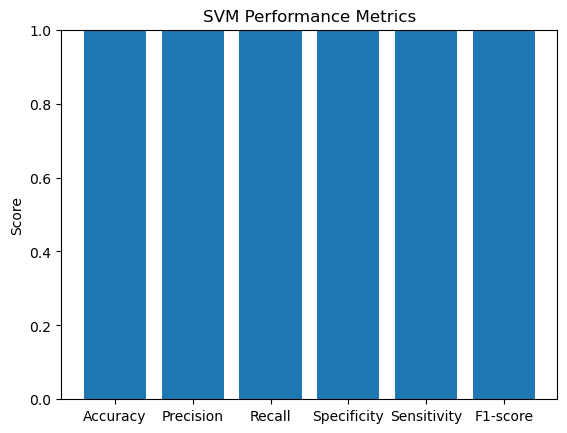

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
Specificity: 100.0%
Sensitivity: 100.0%
F1-score: 100.0%


In [30]:
#Plot the performance scores

scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [svm_accuracy,svm_precision_average, svm_recall_average, svm_specificity_average,svm_sensitivity_average, svm_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('SVM Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

# 
# 
# **RANDOM FOREST**

In [31]:
from sklearn.ensemble import RandomForestClassifier

#Create a model for Random Forest
rf_model = RandomForestClassifier()

In [32]:
#K Fold Cross Validation

rf_lst_accu_stratified = []
rf_overall_cm = np.zeros((3, 3))
for train_index, test_index in skf.split(features, targetClass):
    x_train_fold, x_test_fold = feature_scaled[train_index], feature_scaled[test_index]
    y_train_fold, y_test_fold = targetClass[train_index], targetClass[test_index]
    
    #Train the model using the Training Data
    rf_model.fit(x_train_fold, y_train_fold)
    rf_lst_accu_stratified.append(rf_model.score(x_test_fold, y_test_fold))
    
    #Create the confusion matrix
    rf_y_pred = rf_model.predict(x_test_fold)
    cm = confusion_matrix(y_test_fold, rf_y_pred)
    
    rf_overall_cm += cm
    
# Print the output.
print("RANDOM FOREST MODEL K FOLD CROSS VALIDATION\n")
print('List of possible accuracy:', rf_lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(rf_lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(rf_lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(rf_lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(rf_lst_accu_stratified))

RANDOM FOREST MODEL K FOLD CROSS VALIDATION

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [33]:
# Print the overall confusion matrix
print("Overall Confusion Matrix:")
print(rf_overall_cm)

Overall Confusion Matrix:
[[365.   0.   0.]
 [  0. 303.   0.]
 [  0.   0. 332.]]


In [34]:
#Calculating the performance scores
rf_tp1, rf_tp2, rf_tp3 = 365, 303, 332
rf_fp1, rf_fp2, rf_fp3 = 0, 0, 0
rf_tn1, rf_tn2, rf_tn3 = 635, 697, 668
rf_fn1, rf_fn2, rf_fn3 = 0, 0, 0

rf_tp = rf_tp1 + rf_tp2 + rf_tp3
rf_fp = rf_fp1 + rf_fp2 + rf_fp3
rf_tn = rf_tn1 + rf_tn2 + rf_tn3
rf_fn = rf_fn1 + rf_fn2 + rf_fn3


rf_accuracy = (rf_tp + rf_tn) / (rf_tp + rf_tn + rf_fp + rf_fn)

rf_precision_class1 = rf_tp1 / (rf_tp1 + rf_fp1)
rf_precision_class2 = rf_tp2 / (rf_tp2 + rf_fp2)
rf_precision_class3 = rf_tp3 / (rf_tp3 + rf_fp3)
rf_precision_average = (rf_precision_class1 + rf_precision_class2 + rf_precision_class3) / 3

rf_recall_class1 = rf_tp1 / (rf_tp1 + rf_fn1)
rf_recall_class2 = rf_tp2 / (rf_tp2 + rf_fn2)
rf_recall_class3 = rf_tp3 / (rf_tp3 + rf_fn3)
rf_recall_average = (rf_recall_class1 + rf_recall_class2 + rf_recall_class3) / 3

rf_specificity_class1 = rf_tn1 / ( rf_fp1 + rf_tn1 )
rf_specificity_class2 = rf_tn2 / ( rf_fp2 + rf_tn2 )
rf_specificity_class3 = rf_tn3 / ( rf_fp3 + rf_tn3 )
rf_specificity_average = (rf_specificity_class1 + rf_specificity_class2 + rf_specificity_class3) / 3

rf_sensitivity_class1 = rf_tp1 / (rf_tp1 + rf_fn1)
rf_sensitivity_class2 = rf_tp2 / (rf_tp2 + rf_fn2)
rf_sensitivity_class3 = rf_tp3 / (rf_tp3 + rf_fn3)
rf_sensitivity_average = (rf_sensitivity_class1 + rf_sensitivity_class2 + rf_sensitivity_class3) / 3

rf_f1 = 2 * (rf_precision_average * rf_recall_average) / (rf_precision_average + rf_recall_average)

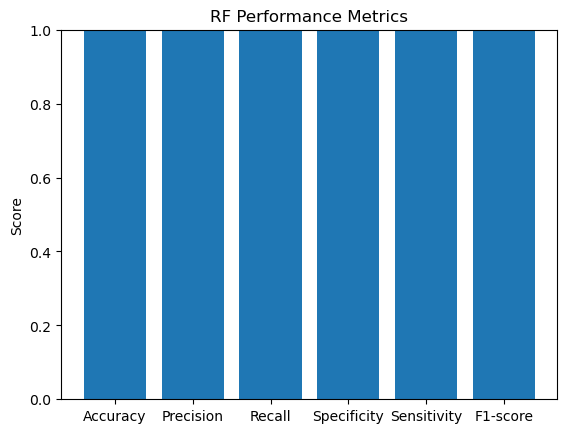

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
Specificity: 100.0%
Sensitivity: 100.0%
F1-score: 100.0%


In [35]:
#Plot the performance scores
scores_label = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity', 'F1-score']
scores_values = [rf_accuracy,rf_precision_average, rf_recall_average, rf_specificity_average,rf_sensitivity_average, rf_f1]

plt.bar(scores_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Score')
plt.title('RF Performance Metrics')

# Show the plot
plt.show()
i=0
for x in scores_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

# 
# 
# 
# 
# ****COMPARISON OF PERFORMANCE SCORES****

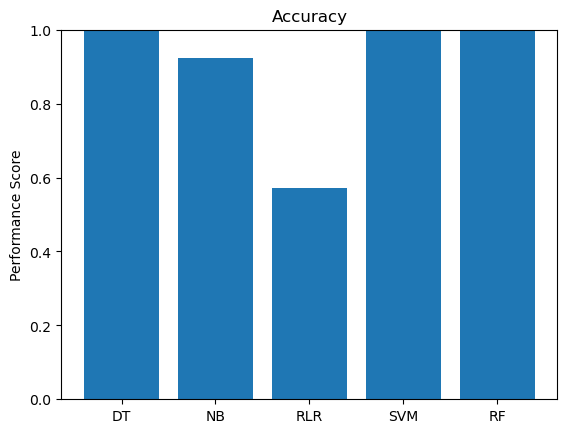

DT: 100.0%
NB: 92.38754325259517%
RLR: 57.18332658842574%
SVM: 100.0%
RF: 100.0%


In [36]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_accuracy, nb_accuracy, rlr_accuracy,svm_accuracy, rf_accuracy]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('Accuracy')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

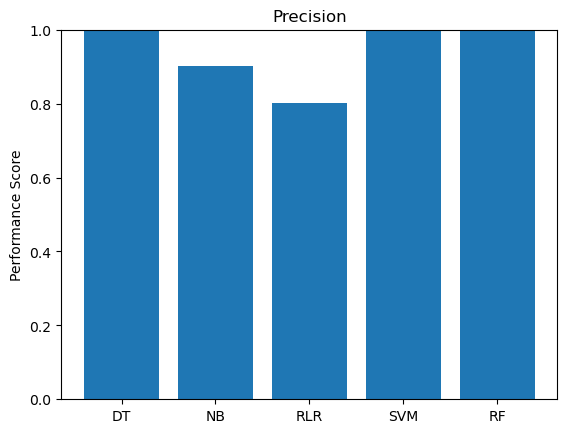

DT: 100.0%
NB: 90.10400576665637%
RLR: 80.27591349739001%
SVM: 100.0%
RF: 100.0%


In [37]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_precision_average, nb_precision_average, rlr_precision_average,svm_precision_average, rf_precision_average]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('Precision')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

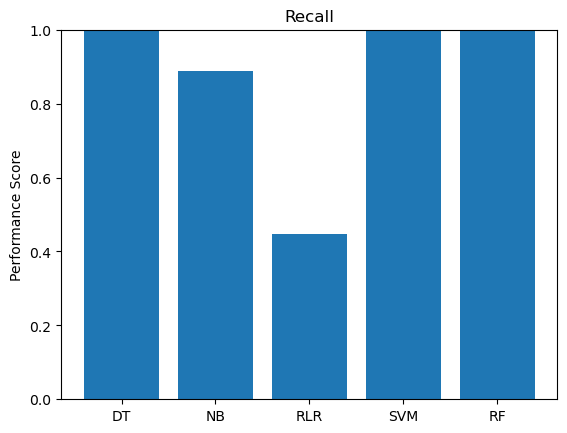

DT: 100.0%
NB: 88.8490895631897%
RLR: 44.648561241666336%
SVM: 100.0%
RF: 100.0%


In [38]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_recall_average, nb_recall_average, rlr_recall_average,svm_recall_average, rf_recall_average]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('Recall')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

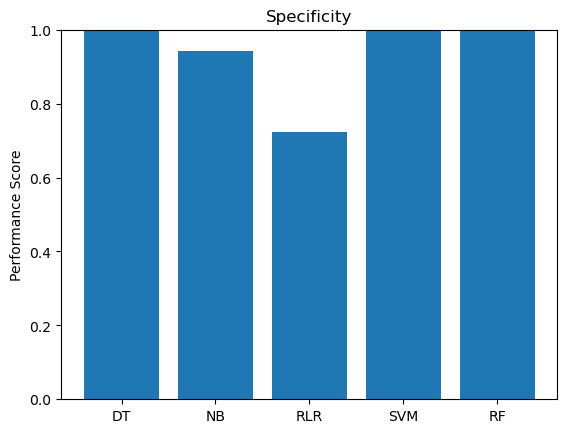

DT: 100.0%
NB: 94.17961960774623%
RLR: 72.23097112860893%
SVM: 100.0%
RF: 100.0%


In [39]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_specificity_average, nb_specificity_average, rlr_specificity_average,svm_specificity_average, rf_specificity_average]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('Specificity')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

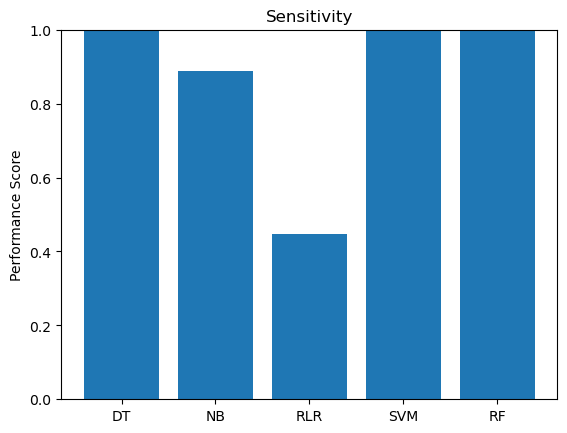

DT: 100.0%
NB: 88.8490895631897%
RLR: 44.648561241666336%
SVM: 100.0%
RF: 100.0%


In [40]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_sensitivity_average, nb_sensitivity_average, rlr_sensitivity_average,svm_sensitivity_average, rf_sensitivity_average]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('Sensitivity')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1

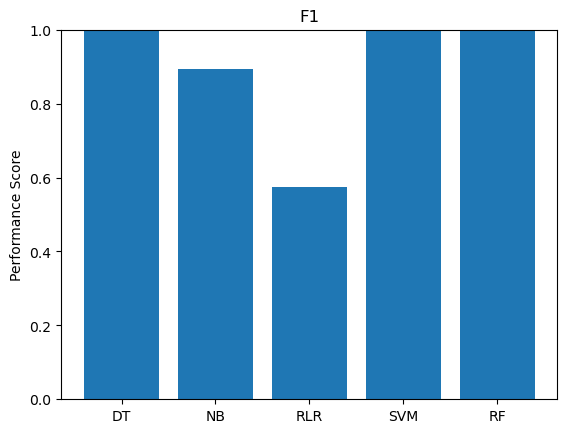

DT: 100.0%
NB: 89.4721475882582%
RLR: 57.38193492517223%
SVM: 100.0%
RF: 100.0%


In [41]:
models_label = ['DT', 'NB', 'RLR', 'SVM', 'RF']
scores_values = [dt_f1, nb_f1, rlr_f1,svm_f1, rf_f1]

plt.bar(models_label, scores_values)
plt.ylim([0, 1])
plt.ylabel('Performance Score')
plt.title('F1')

# Show the plot
plt.show()
i=0
for x in models_label:
    print(f'{x}: {scores_values[i] *100}%')
    i+=1